In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv(r"D:\PM\customer_acquisition_data.csv")
print(data.head())

   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


In [3]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")


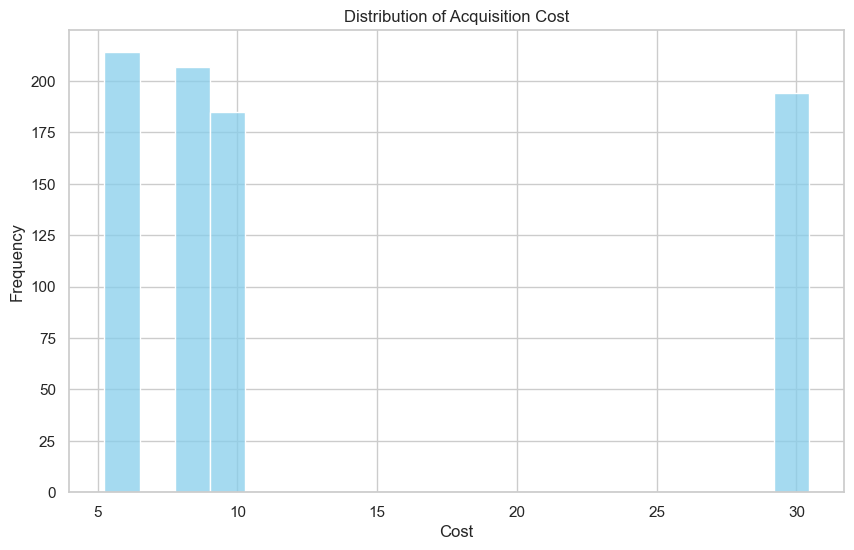

In [4]:
# 1. Distribution of Acquisition Cost
plt.figure(figsize=(10, 6))
sns.histplot(data['cost'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Acquisition Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

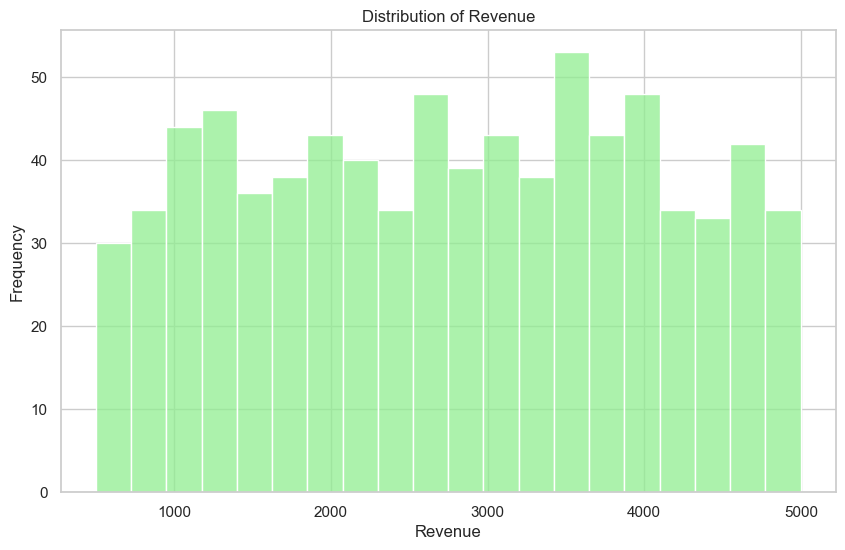

In [5]:
# 2. Distribution of Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data['revenue'], bins=20, kde=False, color='lightgreen')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

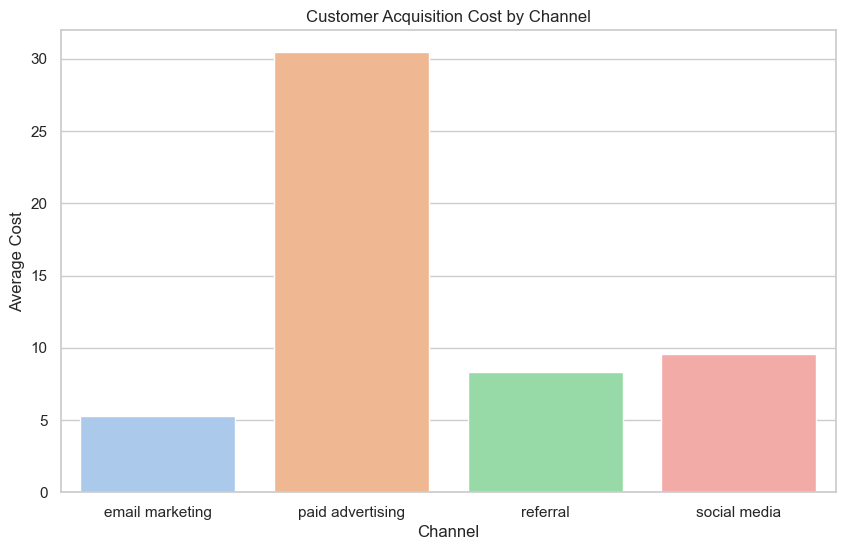

In [6]:
# 3. Customer Acquisition Cost by Channel 
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='channel', y='cost', data=cost_by_channel, palette='pastel')
plt.title('Customer Acquisition Cost by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Cost')
plt.show()

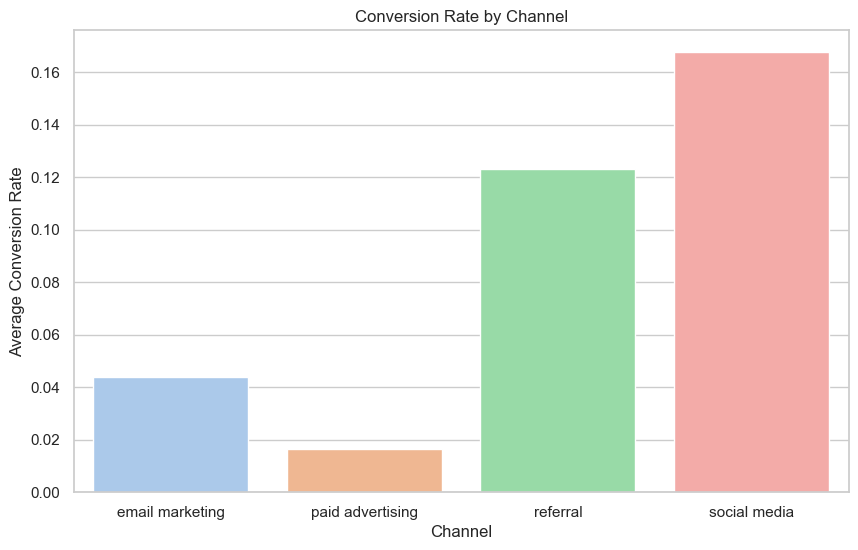

In [7]:
# 4. Conversion Rate by Channel
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='channel', y='conversion_rate', data=conversion_by_channel, palette='pastel')
plt.title('Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Conversion Rate')
plt.show()

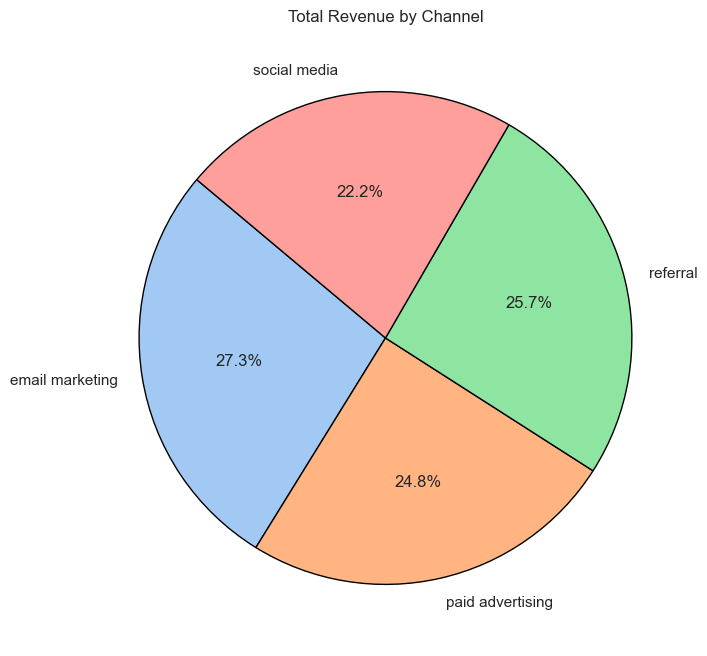

In [8]:
# 5. Total Revenue by Channel (Pie Chart)
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%',
        colors=sns.color_palette('pastel'), startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Total Revenue by Channel')
plt.show()

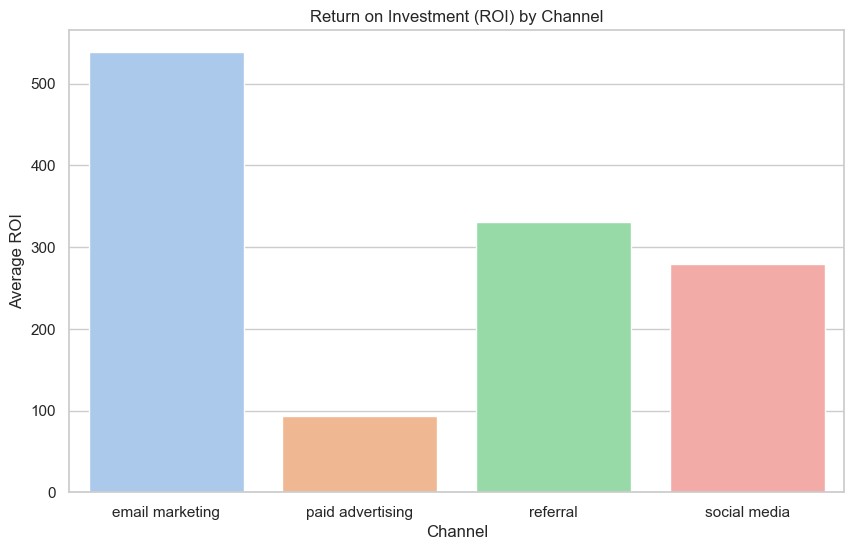

In [9]:
# 6. Return on Investment (ROI) by Channel
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='channel', y='roi', data=roi_by_channel, palette='pastel')
plt.title('Return on Investment (ROI) by Channel')
plt.xlabel('Channel')
plt.ylabel('Average ROI')
plt.show()

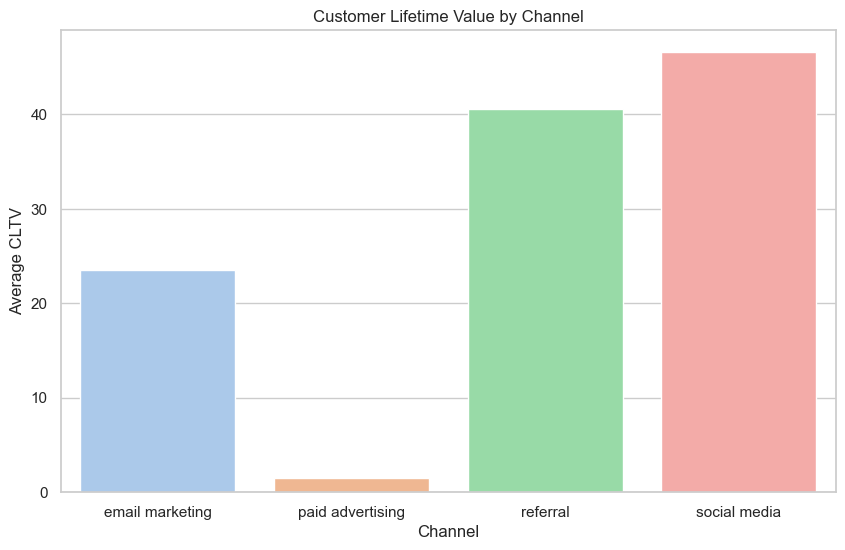

In [10]:
# 7. Customer Lifetime Value (CLTV) by Channel
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='channel', y='cltv', data=channel_cltv, palette='pastel')
plt.title('Customer Lifetime Value by Channel')
plt.xlabel('Channel')
plt.ylabel('Average CLTV')
plt.show()

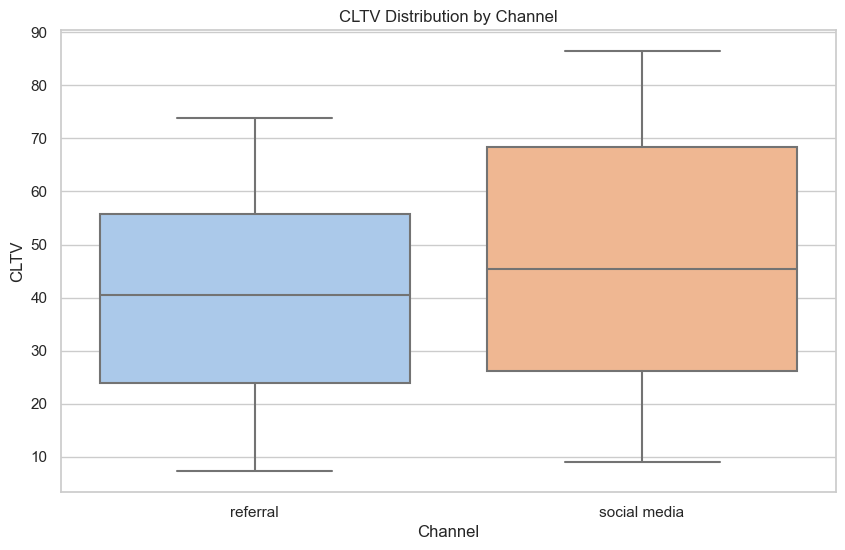

In [11]:
# 8. CLTV Distribution by Channel (Boxplot)
subset = data.loc[data['channel'].isin(['social media', 'referral'])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel', y='cltv', data=subset, palette='pastel')
plt.title('CLTV Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.show()